<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/deeplearningstudy/blob/main/02_%EA%B8%B0%EB%B3%B8%EC%B0%A8%ED%8A%B8%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

패키지 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/trade_apt_api_2023_address.txt', sep='\t')
df.head()

,기준년월,지역명,지역코드,법정동,아파트,거래금액,년,월,일,건축년도,전용면적,지번,층
0,202306,종로구,11110,사직동,광화문스페이스본(101동~105동),"138,000",2023,6,9,2008,95.880,9,9
1,202306,종로구,11110,사직동,광화문스페이스본(101동~105동),"170,000",2023,6,10,2008,146.920,9,8
2,202306,종로구,11110,사직동,사직아파트,"84,000",2023,6,12,1970,116.230,1-8,6
3,202306,종로구,11110,당주동,롯데미도파광화문빌딩,"93,000",2023,6,20,1981,149.950,145,9
4,202306,종로구,11110,신문로2가,디팰리스,"408,000",2023,6,24,2020,148.111,171,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준년월    2302 non-null   int64  
 1   지역명     2302 non-null   object 
 2   지역코드    2302 non-null   int64  
 3   법정동     2302 non-null   object 
 4   아파트     2302 non-null   object 
 5   거래금액    2302 non-null   object 
 6   년       2302 non-null   int64  
 7   월       2302 non-null   int64  
 8   일       2302 non-null   int64  
 9   건축년도    2302 non-null   int64  
 10  전용면적    2302 non-null   float64
 11  지번      2302 non-null   object 
 12  층       2302 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 233.9+ KB


In [ ]:
df['거래금액'] = df['거래금액'].str.replace(',', '').str.replace(' ', '').astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준년월    2302 non-null   int64  
 1   지역명     2302 non-null   object 
 2   지역코드    2302 non-null   int64  
 3   법정동     2302 non-null   object 
 4   아파트     2302 non-null   object 
 5   거래금액    2302 non-null   int64  
 6   년       2302 non-null   int64  
 7   월       2302 non-null   int64  
 8   일       2302 non-null   int64  
 9   건축년도    2302 non-null   int64  
 10  전용면적    2302 non-null   float64
 11  지번      2302 non-null   object 
 12  층       2302 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 233.9+ KB


In [ ]:
df_cnt = df.groupby('기준년월').count()['거래금액']
df_cnt

기준년월
202201     76
202202     85
202203    114
202204    139
202205    136
202206     84
202207     70
202208    113
202209     48
202210     35
202211     38
202212     49
202301    113
202302    214
202303    211
202304    216
202305    291
202306    270
Name: 거래금액, dtype: int64

In [ ]:
x1 = df_cnt.values

1. 기본차트 그려보기

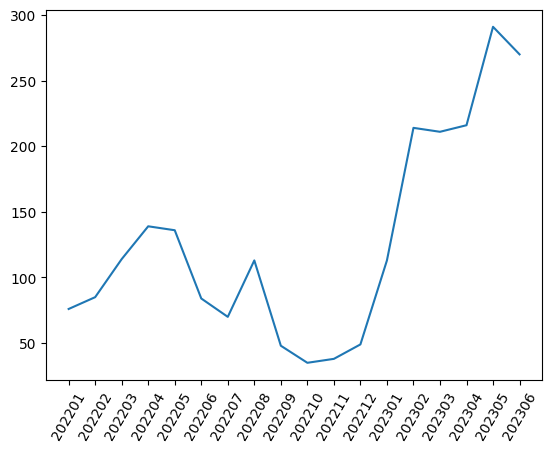

In [ ]:
plt.xticks(np.arange(len(df_cnt.index)), labels=df_cnt.index)
plt.tick_params(axis='x', labelrotation=60)
plt.plot(x1)
plt.show()

2. 데이터 추가하기

In [ ]:
df_num = df.select_dtypes(include=np.number)
df_num.head()

,기준년월,지역코드,거래금액,년,월,일,건축년도,전용면적,층
0,202306,11110,138000,2023,6,9,2008,95.880,9
1,202306,11110,170000,2023,6,10,2008,146.920,8
2,202306,11110,84000,2023,6,12,1970,116.230,6
3,202306,11110,93000,2023,6,20,1981,149.950,9
4,202306,11110,408000,2023,6,24,2020,148.111,10


In [ ]:
df_mean = df_num.groupby('기준년월').mean()['거래금액']
df_mean

기준년월
202201    178784.907895
202202    176651.564706
202203    197273.245614
202204    232832.446043
202205    208996.691176
202206    213556.690476
202207    196403.571429
202208     94087.318584
202209    142999.937500
202210    160898.142857
202211    203631.578947
202212    163493.877551
202301    168342.123894
202302    167463.177570
202303    199844.976303
202304    216480.601852
202305    195190.343643
202306    217566.666667
Name: 거래금액, dtype: float64

In [ ]:
x2 = df_mean.values

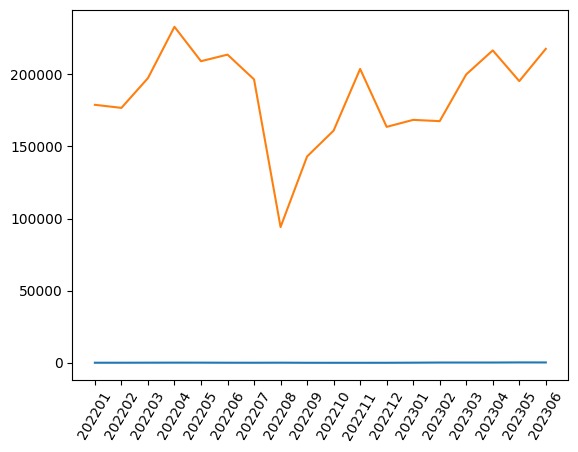

In [ ]:
plt.xticks(np.arange(len(df_cnt.index)), labels=df_cnt.index)
plt.tick_params(axis='x', labelrotation=60)
plt.plot(x1)
plt.plot(x2)
plt.show()

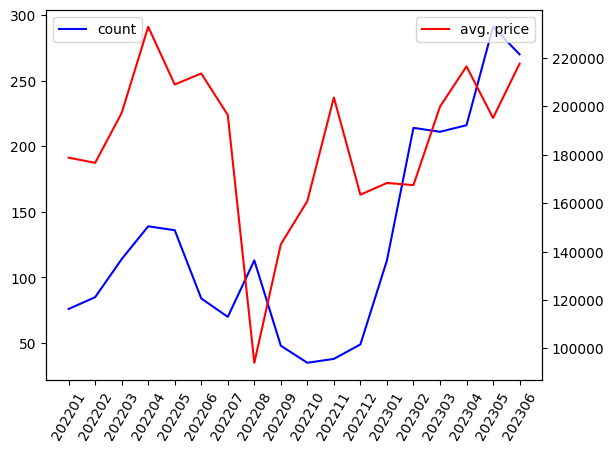

In [ ]:
fig, ax1 = plt.subplots()
plt.xticks(np.arange(len(df_cnt.index)), labels=df_cnt.index)
plt.tick_params(axis='x', labelrotation=60)

plt.plot(x1, color='b', label='count')
plt.legend()

ax2 = ax1.twinx()

plt.plot(x2, color='r', label='avg. price')
plt.legend()


plt.show()

차트 요소 정리

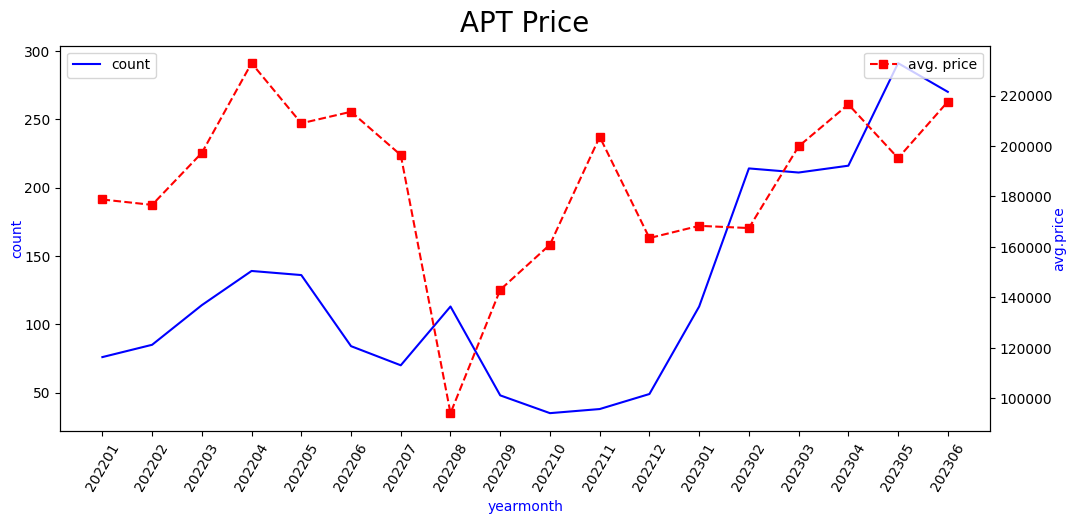

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,5))

plt.xlabel('yearmonth', loc='center', labelpad=5, fontsize=10, color='blue')
plt.xticks(np.arange(len(df_cnt.index)), labels=df_cnt.index)
plt.tick_params(axis='x', labelrotation=60)

plt.ylabel('count', labelpad=0, fontsize=10, color='blue')
plt.plot(x1, color='b', label='count')
plt.legend()

ax2 = ax1.twinx()
plt.ylabel('avg.price', labelpad=0, fontsize=10, color='blue')
plt.plot(x2, 'sr--', label='avg. price')
plt.legend()

plt.title('APT Price', loc='center', pad=10, fontsize=20, color='black')


plt.show()